In [ ]:
import yfinance as yf
import pandas as pd

gold_data = yf.download('GLD', start='2015-04-04', end='2024-04-04')

In [ ]:
!pip install yfinance pandas

In [ ]:
gold_data

In [ ]:
gold_data = gold_data.dropna()

In [ ]:
gold_data

In [ ]:
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['Volatility'] = gold_data['Close'].rolling(window=10).std()
gold_data['Return'] = gold_data['Close'].pct_change()

In [ ]:
gold_data

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
features = ['MA_10', 'MA_50', 'Volatility', 'Return']
X = gold_data[features]
y = gold_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
gold_data2 = yf.download('GLD', start='2024-03-02', end='2024-05-24')

In [ ]:
gold_data2 = gold_data2.dropna()

In [ ]:
gold_data2['MA_10'] = gold_data2['Close'].rolling(window=10).mean()
gold_data2['MA_50'] = gold_data2['Close'].rolling(window=50).mean()
gold_data2['Volatility'] = gold_data2['Close'].rolling(window=10).std()
gold_data2['Return'] = gold_data2['Close'].pct_change()

In [ ]:
gold_data2.info()

In [ ]:
gold_data2

In [ ]:
def predict_future_gold_price():
    ma_10 = 220.225999
    ma_50 = 213.4290
    volatility = 3.162183
    return_pct =  -0.019945

    input_data = pd.DataFrame([[ma_10, ma_50, volatility, return_pct]], columns=features)
    input_data_scaled = scaler.transform(input_data)
    future_price = model.predict(input_data_scaled)
    print(future_price)
    return future_price[0]

print(predict_future_gold_price())

In [ ]:
import requests

def fetch_real_time_gold_price_alpha_vantage():
    API_KEY = 'QYHRK01Q1ORWYPSJ'
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GLD&interval=1min&apikey={API_KEY}'

    response = requests.get(url)
    data = response.json()
    print(data)
    if "Time Series (1min)" in data:
        latest_time = list(data['Time Series (1min)'].keys())[0]
        latest_data = data['Time Series (1min)'][latest_time]
        latest_price = float(latest_data['4. close'])
        return latest_price
    else:
        print(f"Error fetching data: {data}")
        return None

# Example usage
gold_price = fetch_real_time_gold_price_alpha_vantage()
if gold_price:
    print(f"Real-time gold price (via Alpha Vantage): ${gold_price:.2f}")


In [ ]:
gold_data2 = yf.download('GLD', start='2024-05-14', end='2024-05-25')

In [ ]:
gold_data2

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fetch historical gold prices (using GLD ETF as a proxy)
gold_data = yf.download('GLD', start='2015-05-08', end='2024-05-24')
print(gold_data.head())

# Handle missing values
gold_data = gold_data.dropna()

# Create relevant features
gold_data['MA_10'] = gold_data['Close'].rolling(window=10).mean()
gold_data['MA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['Volatility'] = gold_data['Close'].rolling(window=10).std()
gold_data['Return'] = gold_data['Close'].pct_change()

# Drop rows with NaN values created by rolling window calculations
gold_data = gold_data.dropna()
print(gold_data.head())

# Define features and target
features = ['MA_10', 'MA_50', 'Volatility', 'Return']
X = gold_data[features]
y = gold_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

def fetch_real_time_gold_price_alpha_vantage():
    # Replace with your actual Alpha Vantage API key
    API_KEY = 'QYHRK01Q1ORWYPSJ'
    symbol = 'GLD'  # GLD is an ETF that tracks the price of gold
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval=1min&apikey={API_KEY}'

    response = requests.get(url)
    data = response.json()

    if "Time Series (1min)" in data:
        latest_time = list(data['Time Series (1min)'].keys())[0]
        latest_data = data['Time Series (1min)'][latest_time]
        latest_price = float(latest_data['4. close'])
        return latest_price
    else:
        print(f"Error fetching data: {data}")
        return None

def predict_future_gold_price():
    # Fetch real-time gold data
    gold_price = fetch_real_time_gold_price_alpha_vantage()
    if gold_price is None:
        return None

    # Assume we have the recent values for MA_10, MA_50, Volatility, and Return
    recent_data = gold_data.iloc[-1]
    ma_10 = recent_data['MA_10']
    ma_50 = recent_data['MA_50']
    volatility = recent_data['Volatility']
    return_pct = recent_data['Return']

    # Prepare the input data for prediction
    input_data = pd.DataFrame([[ma_10, ma_50, volatility, return_pct]], columns=features)
    input_data_scaled = scaler.transform(input_data)

    # Predict future gold price
    future_price = model.predict(input_data_scaled)
    return future_price[0]

# Example usage
future_gold_price = predict_future_gold_price()
if future_gold_price:
    print(f"Predicted future gold price: {future_gold_price}")


In [ ]:
!pip install ccxt

In [ ]:
import ccxt
import pandas as pd

# Initialize the exchange (e.g., Binance)
exchange = ccxt.binance()

# Fetch historical data for Bitcoin
symbol = 'BTC/USDT'
timeframe = '1d'
since = exchange.parse8601('2010-01-01T00:00:00Z')

# Fetch the data
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
print(data.head())

In [ ]:
data.info()

In [ ]:
data.iloc[-1]

In [ ]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta

# Initialize the exchange (e.g., Binance)
exchange = ccxt.binance()

# Fetch historical data for Bitcoin
symbol = 'BTC/USDT'
timeframe = '1h'
since = exchange.parse8601('2010-01-01T00:00:00Z')
limit = 100
all_ohlcv = []

while since < exchange.milliseconds():
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
    if not ohlcv:
        break
    since = ohlcv[-1][0] + 24 * 60 * 60 * 1000  # Move to the next day in milliseconds
    all_ohlcv.extend(ohlcv)
    print(f"Fetched {len(ohlcv)} records, total: {len(all_ohlcv)}")

# Convert to DataFrame
data = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
print(data.head())
print(data.tail())


In [ ]:
# Create relevant features
data['MA_10'] = data['close'].rolling(window=10).mean()
data['MA_50'] = data['close'].rolling(window=50).mean()
data['Volatility'] = data['close'].rolling(window=10).std()
data['Return'] = data['close'].pct_change()

# Drop rows with NaN values created by rolling window calculations
data = data.dropna()
print(data.head())

# Define features and target
features = ['MA_10', 'MA_50', 'Volatility', 'Return']
X = data[features]
y = data['close']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
data.info()

In [ ]:
data.tail()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model to a .pkl file
import pickle
with open('crypto_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler to a .pkl file
with open('crypto_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json

def get_stock_advice(url):
    # Send a GET request to the website
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the section containing the news articles
        middle_section = soup.find('div', {'class': 'middle_section'})
        
        # Prepare data for JSON
        data = []
        
        if middle_section:
            # Extract individual news items from 'news_list'
            news_list = middle_section.find('ul', {'class': 'news_list'})
            if news_list:
                articles = news_list.find_all('li')
                for article in articles:
                    stock_info = article.find('div', {'class': 'rb_gd14'})
                    stock_name_link = stock_info.find('a')
                    stock_name = stock_name_link.get_text(strip=True)
                    stock_price = stock_info.find_all('strong')[1].get_text(strip=True).replace(',', '')
                    
                    try:
                        stock_price_float = float(stock_price)
                    except ValueError:
                        stock_price_float = 0.0
                    
                    article_link = article.find('div', {'class': 'MT5'}).find('a')
                    recommendation = article_link.get_text(strip=True)
                    
                    # Trim recommendation up to the first colon and parse details
                    recommendation_parts = recommendation.split(':')
                    if len(recommendation_parts) > 1:
                        recommendation_trimmed = recommendation_parts[0].split(';')[0].strip()
                        source = recommendation_parts[-1].strip()
                    else:
                        recommendation_trimmed = recommendation
                        source = ''
                    
                    # Extract target price
                    match = re.search(r'target of Rs (\d+[:,]?\d+)', recommendation)
                    if match:
                        target_value = match.group(1).replace(',', '')
                        try:
                            target_value_float = float(target_value)
                        except ValueError:
                            target_value_float = 0.0
                    else:
                        target_value = ''
                        target_value_float = 0.0
                    
                    # Calculate revenue
                    revenue = target_value_float - stock_price_float
                    
                    # Calculate profit percent
                    if stock_price_float != 0:
                        profit_percent = (revenue / stock_price_float) * 100
                    else:
                        profit_percent = 0.0
                    
                    data.append({
                        'Stock Name': stock_name,
                        'Price': f'Rs {stock_price}',
                        'Recommendation': recommendation_trimmed,
                        'Target Price': target_value,
                        'Source': source,
                        'Revenue': f'Rs {revenue:.2f}',
                        'Profit Percent': f'{profit_percent:.2f}%'
                    })
            else:
                return json.dumps({'error': 'No news list found on the page.'})
        else:
            return json.dumps({'error': 'No middle section found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})
    
    # Sort data by profit percent in descending order and select top 3
    top_3_stocks = sorted(data, key=lambda x: float(x['Profit Percent'].replace('%', '')), reverse=True)[:3]
    
    return json.dumps(top_3_stocks, indent=4)




def get_top_cryptos(url1):
    # Send a GET request to the website
    response = requests.get(url1)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table containing the cryptocurrency data
        table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw'})

        if table:
            # Extract rows from the table
            rows = table.find_all('tr')[1:]  # Exclude header row
            top_3_rows = rows[:3]  # Select only the top 3 rows

            data = []
            for row in top_3_rows:
                columns = row.find_all('td')
                name = columns[0].get_text(strip=True)
                price = columns[1].get_text(strip=True).replace(',', '')
                chg_percent = columns[3].get_text(strip=True)
                high_52_week = columns[6].get_text(strip=True).replace(',', '')
                low_52_week = columns[7].get_text(strip=True).replace(',', '')
                technical_review = columns[8].get_text(strip=True)  

                data.append({
                    'Name': name,
                    'Price': f'Rs. {price}',
                    'Change Percent': chg_percent,
                    '52 Week High': f'Rs. {high_52_week}',
                    '52 Week Low': f'Rs. {low_52_week}',
                    'Technical Review': technical_review
                })

            return json.dumps(data, indent=4)
        else:
            return json.dumps({'error': 'No table found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})


# URL of the website
url = 'https://m.moneycontrol.com/markets/stock-advice/'
top_3_stocks_json = get_stock_advice(url)
print(top_3_stocks_json)

url1 = 'https://www.moneycontrol.com/crypto-market/market-movers/top-cryptos/inr'
top_3_cryptos_json = get_top_cryptos(url1)
print(top_3_cryptos_json)

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import json


def replace_unicode_sequences(data):
    for entry in data:
        for key, value in entry.items():
            entry[key] = value.replace("\\u2013", "–")
    return data


def get_rds(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    print(response)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        # Find the table containing the RD interest rates
        table = soup.find('table', {'border': '1'})  # Adjusted to find the correct table
        
        if table:
            # Extract rows from the table
            rows = table.find_all('tr')[1:]  # Exclude header row
            data = []
            
            for row in rows:
                columns = row.find_all('td')
                if len(columns) == 3:
                    bank_name = columns[0].text.strip()
                    general_interest_rate = columns[1].text.strip()
                    senior_citizen_interest_rate = columns[2].text.strip()
                    data.append({
                        'Bank': bank_name,
                        'General Interest Rates': general_interest_rate,
                        'Senior Citizen Interest Rates': senior_citizen_interest_rate
                    })
            fin_data = replace_unicode_sequences(data)
            return fin_data
        else:
            return json.dumps({'error': 'No table found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})

pqr = get_rds('https://groww.in/recurring-deposit/rd-interest-rates')
print(pqr)

In [ ]:
def get_crypto_data(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    print(response)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table containing the cryptocurrency data
        table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw'})

        if table:
            # Extract rows from the table
            count = 0
            rows = table.find_all('tr')[1:]  # Exclude header row
            data = []
            for row in rows:
                count =+ 1
                columns = row.find_all('td')
                name = columns[0].get_text(strip=True)
                price = columns[1].get_text(strip=True).replace(',', '')
                change = columns[2].get_text(strip=True)
                chg_percent = columns[3].get_text(strip=True)
                high_24h = columns[4].get_text(strip=True).replace(',', '')
                low_24h = columns[5].get_text(strip=True).replace(',', '')
                high_52_week = columns[6].get_text(strip=True).replace(',', '')
                low_52_week = columns[7].get_text(strip=True).replace(',', '')
                perf_3m = columns[8].get_text(strip=True)
                technical_review = columns[9].get_text(strip=True)

                data.append({
                    'Name': name,
                    'Price': f'Rs. {price}',
                    'Change': change,
                    'Change Percent': chg_percent,
                    '24H High': f'Rs. {high_24h}',
                    '24H Low': f'Rs. {low_24h}',
                    '52 Week High': f'Rs. {high_52_week}',
                    '52 Week Low': f'Rs. {low_52_week}',
                    '3M Performance': perf_3m,
                    'Technical Review': technical_review
                })

            print(count)
            return data
        else:
            return json.dumps({'error': 'No table found on the page.'})
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})


In [ ]:
crypto_data = get_crypto_data('https://www.moneycontrol.com/crypto-market/market-movers/top-cryptos/inr')

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import time 

def get_top_cryptos(url):
    time.sleep(3)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    # Send a GET request to the website
    response = requests.get(url, headers=headers) 
    time.sleep(5)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        time.sleep(5)
        main_data = {}
        r1_r2_s1_data = {}
        time.sleep(5)
      
        main_table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw'})
    
        r1_r2_s1_table = soup.find('table', {'class': 'tableWrapper_web_tbl_indices__qR1nw sortdatatable'})
        time.sleep(5)
        if main_table:
           
            rows = main_table.find_all('tr')[1:]  # Exclude header row

            for row in rows:
                columns = row.find_all('td')
                if len(columns) >= 10:  # Ensure there are enough columns
                    name = columns[0].get_text(strip=True)
                    price = columns[1].get_text(strip=True).replace(',', '')
                    change = columns[2].get_text(strip=True)
                    chg_percent = columns[3].get_text(strip=True)
                    high_24h = columns[4].get_text(strip=True).replace(',', '')
                    low_24h = columns[5].get_text(strip=True).replace(',', '')
                    high_52_week = columns[6].get_text(strip=True).replace(',', '')
                    low_52_week = columns[7].get_text(strip=True).replace(',', '')
                    perf_3m = columns[8].get_text(strip=True)
                    technical_review = columns[9].get_text(strip=True)

                    entry = {
                        'Name': name,
                        'Price': f'Rs. {price}',
                        'Change': change,
                        'Change Percent': chg_percent,
                        '24H High': f'Rs. {high_24h}',
                        '24H Low': f'Rs. {low_24h}',
                        '52 Week High': f'Rs. {high_52_week}',
                        '52 Week Low': f'Rs. {low_52_week}',
                        '3M Performance': perf_3m,
                        'Technical Review': technical_review
                    }

                    main_data[name] = entry

        if r1_r2_s1_table:
           
            rows = r1_r2_s1_table.find_all('tr')[1:]  # Exclude header row

            for row in rows:
                columns = row.find_all('td')
                if len(columns) >= 9:  # Ensure there are enough columns
                    name = columns[0].get_text(strip=True)
                    ltp = columns[1].get_text(strip=True).replace(',', '')
                    pivot_point = columns[2].get_text(strip=True).replace(',', '')
                    r1 = columns[3].get_text(strip=True).replace(',', '')
                    r2 = columns[4].get_text(strip=True).replace(',', '')
                    r3 = columns[5].get_text(strip=True).replace(',', '')
                    s1 = columns[6].get_text(strip=True).replace(',', '')
                    s2 = columns[7].get_text(strip=True).replace(',', '')
                    s3 = columns[8].get_text(strip=True).replace(',', '')

                    entry = {
                        'Name': name,
                        'LTP': f'Rs. {ltp}',
                        'Pivot Point': f'Rs. {pivot_point}',
                        'R1': f'Rs. {r1}',
                        'R2': f'Rs. {r2}',
                        'R3': f'Rs. {r3}',
                        'S1': f'Rs. {s1}',
                        'S2': f'Rs. {s2}',
                        'S3': f'Rs. {s3}'
                    }

                    r1_r2_s1_data[name] = entry

        # Combine the two dictionaries based on the 'Name'
        combined_data = []
        for name, main_entry in main_data.items():
            if name in r1_r2_s1_data:
                combined_entry = {**main_entry, **r1_r2_s1_data[name]}
                combined_data.append(combined_entry)

        return json.dumps(combined_data, indent=4)
    else:
        return json.dumps({'error': 'Failed to retrieve the webpage.'})

url = 'https://www.moneycontrol.com/crypto-market/market-movers/top-cryptos/inr'
top_cryptos_json = get_top_cryptos(url)
print(top_cryptos_json)

# For Bonds


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1, max_price):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond containers
        bond_cards = soup.find_all('div', class_='container company-block')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_card in bond_cards:
            bond_issuer = bond_card.find('span', class_='bondIssuer').text.strip() if bond_card.find('span', class_='bondIssuer') else 'N/A'
            bond_maturity = bond_card.find('span', class_='bondMaturity').text.strip() if bond_card.find('span', class_='bondMaturity') else 'N/A'
            bond_yield = bond_card.find('span', class_='bondYield').text.strip() if bond_card.find('span', class_='bondYield') else 'N/A'
            
            # Find the price element correctly
            price_block = bond_card.find('p', class_='info-title', text='Price')
            bond_price_str = price_block.find_next('p', class_='info-value').text.strip() if price_block else 'N/A'
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())
            
            # Filter bonds within the specified price range
            if bond_price <= max_price:
                bond_details = {
                    'issuer': bond_issuer,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str
                }
                count=count+1
                bonds.append(bond_details)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid',10000)
if pqr:
    print(pqr)


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond containers
        bond_cards = soup.find_all('div', class_='container company-block')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_card in bond_cards:
            bond_issuer = bond_card.find('span', class_='bondIssuer').text.strip() if bond_card.find('span', class_='bondIssuer') else 'N/A'
            bond_maturity = bond_card.find('span', class_='bondMaturity').text.strip() if bond_card.find('span', class_='bondMaturity') else 'N/A'
            bond_yield = bond_card.find('span', class_='bondYield').text.strip() if bond_card.find('span', class_='bondYield') else 'N/A'
            
            # Find the price element correctly
            price_block = bond_card.find('p', class_='info-title', text='Price')
            bond_price_str = price_block.find_next('p', class_='info-value').text.strip() if price_block else 'N/A'
            
            # Filter bonds within the specified price range
            if bond_price_str:
                bond_details = {
                    'issuer': bond_issuer,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str
                }
                count=count+1
                bonds.append(bond_details)
        bonds.sort(key=lambda x: float(x['yield'].replace('%', '').strip()), reverse=True)
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
if pqr:
    print(pqr)


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successfulss
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        #print(soup)
        # Find the bond containers
        bond_cards = soup.find_all('div', class_='container company-block')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_card in bond_cards:
            bond_issuer = bond_card.find('span', class_='bondIssuer').text.strip() if bond_card.find('span', class_='bondIssuer') else 'N/A'
            bond_maturity = bond_card.find('span', class_='bondMaturity').text.strip() if bond_card.find('span', class_='bondMaturity') else 'N/A'
            bond_yield = bond_card.find('span', class_='bondYield').text.strip() if bond_card.find('span', class_='bondYield') else 'N/A'
            
            # Find the price element correctly
            price_block = bond_card.find('p', class_='info-title', text='Price')
            bond_price_str = price_block.find_next('p', class_='info-value').text.strip() if price_block else 'N/A'
            # Filter bonds within the specified price range
            if bond_price_str:
                bond_details = {
                    'issuer': bond_issuer,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str
                }
                count=count+1
                bonds.append(bond_details)
        bonds.sort(key=lambda x: float(x['yield'].replace('%', '').strip()), reverse=True)
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
        
        return 
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
#print(pqr)

In [ ]:
print(pqr)

# MAINNNNNNNNNNNN


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        #print(soup)
        # Find the bond containers
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        count =0
        # Iterate over each bond card and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())

            # Filter bonds within the specified price range
            if bond_price:
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency
                }
                
                bonds.append(bond_details)
        bonds.sort(key=lambda x: float(x['yield'].replace('%', '').strip()), reverse=True)
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) 
        print(count)# ensure_ascii=False to properly display Unicode characters
        return bond_details_json
        
    else:
        return None

pqr = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
#print(pqr)

In [ ]:
print(pqr)

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def get_bond_details(url1, min_price=None, max_price=None):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())

            # Calculate the maturity in years
            maturity_year = int(bond_maturity.split()[-1])
            current_year = 2024  # You can set this to the current year
            maturity_period = maturity_year - current_year

            # Determine the number of payments per year based on the frequency
            if bond_frequency == 'MONTHLY':
                payments_per_year = 12
            elif bond_frequency == 'QUARTERLY':
                payments_per_year = 4
            elif bond_frequency == 'SEMI ANNUAL':
                payments_per_year = 2
            elif bond_frequency == 'CUMULATIVE AT MATURITY':
                payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
            else:  # Assume ANNUALLY
                payments_per_year = 1

            # Calculate the total interest earned
            annual_coupon_rate = float(bond_coupon.replace('%', '').strip()) / 100
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period
            else:
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period

            # Calculate the profit
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                profit = total_interest_payments
            else:
                profit = total_interest_payments - bond_price

            # Calculate the Yield to Maturity (YTM) if the bond is not cumulative
            ytm = float(bond_yield.replace('%', '').strip()) / 100
            
            # Filter bonds within the specified price range
            if min_price is None or max_price is None or (min_price <= bond_price <= max_price):
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency,
                    'profit': f"₹ {profit:,.2f}",
                    'ytm': ytm
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) # ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

# Specify the price range (if needed)
min_price = 80000
max_price = 100000

pqr = get_bond_details('https://www.indiabonds.com/search/?search=&frequency__in=6&offer_price_yield_value__gte=10&limit=100&switch_one=radio-grid', min_price, max_price)
if pqr:
    print(pqr)


In [ ]:
monthly_data = {
    "name": "SATYA MICROCAPITAL LIMITED",
    "coupon": "13.8500%",
    "maturity": "Jul 2029",
    "yield": "14.7000%",
    "price": "₹  1,00,863.01",
    "frequency": "MONTHLY"
}
quarterly_data =     {
        "name": "EARLYSALARY SERVICES PRIVATE LIMITED",
        "coupon": "11.7500%",
        "maturity": "Dec 2025",
        "yield": "13.2000%",
        "price": "₹  1,01,161.47",
        "frequency": "QUARTERLY"
    }
semi_annualy_data=     {
        "name": "JANA SMALL FINANCE BANK LIMITED",
        "coupon": "13.8000%",
        "maturity": "Jul 2027",
        "yield": "11.7500%",
        "price": "₹  2,46,363.43",
        "frequency": "SEMI ANNUALLY"
    },
annualy_data =     {
        "name": "IIFL SAMASTA FINANCE LIMITED",
        "coupon": "10.0000%",
        "maturity": "Dec 2026",
        "yield": "9.8477%",
        "price": "₹  1,045.99",
        "frequency": "ANNUALLY"
    }

In [ ]:
def calculate_bond_profit(bond_data):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity perio=d in years
    maturity_period = maturity_year - current_year
    
    # Assuming the face value of the bond is ₹100,000
    face_value = 100000
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

# Sample bond data
monthly_data = {
    "name": "SATYA MICROCAPITAL LIMITED",
    "coupon": "13.8500%",
    "maturity": "Jul 2029",
    "yield": "14.7000%",
    "price": "₹  1,00,863.01",
    "frequency": "MONTHLY"
}

# Calculate the profit
bond_profit = calculate_bond_profit(monthly_data)
print(bond_profit)


In [ ]:
def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years
    maturity_period = maturity_year - current_year
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity perio=d in years
    maturity_period = maturity_year - current_year
    
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

def get_bond_details(url1, min_price=None, max_price=None):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())

            # Calculate the maturity in years
            maturity_year = int(bond_maturity.split()[-1])
            current_year = 2024  # You can set this to the current year
            maturity_period = maturity_year - current_year

            # Determine the number of payments per year based on the frequency
            if bond_frequency == 'MONTHLY':
                payments_per_year = 12
            elif bond_frequency == 'QUARTERLY':
                payments_per_year = 4
            elif bond_frequency == 'SEMI ANNUAL':
                payments_per_year = 2
            elif bond_frequency == 'CUMULATIVE AT MATURITY':
                payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
            else:  # Assume ANNUALLY
                payments_per_year = 1

            # Calculate the total interest earned
            annual_coupon_rate = float(bond_coupon.replace('%', '').strip()) / 100
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period
            else:
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period

            # Calculate the profit
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                profit = total_interest_payments
            else:
                profit = total_interest_payments - bond_price

            # Calculate the Yield to Maturity (YTM) if the bond is not cumulative
            ytm = float(bond_yield.replace('%', '').strip()) / 100
            
            # Filter bonds within the specified price range
            if min_price is None or max_price is None or (min_price <= bond_price <= max_price):
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency,
                    'profit': f"₹ {profit:,.2f}",
                    'ytm': ytm
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) # ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

min_price = 80000
max_price = 100000

pqr = get_bond_details('https://www.indiabonds.com/search/?search=&frequency__in=6&offer_price_yield_value__gte=10&limit=100&switch_one=radio-grid', min_price, max_price)

# Estimate the face value
estimated_face_value = estimate_face_value(monthly_data)
# Calculate the profit
bond_profit = calculate_bond_profit(monthly_data, estimated_face_value )
print(bond_profit)

In [ ]:
from datetime import datetime

def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period_years  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return json.dumps({
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }, indent=4, ensure_ascii=False)

# Sample bond data
monthly_data = {
    "name": "SATYA MICROCAPITAL LIMITED",
    "coupon": "13.8500%",
    "maturity": "Jul 2029",
    "yield": "14.7000%",
    "price": "₹  1,00,863.01",
    "frequency": "MONTHLY"
}

# Estimate the face value
estimated_face_value = estimate_face_value(monthly_data)
# Calculate the profit
bond_profit = calculate_bond_profit(monthly_data, estimated_face_value)
print(bond_profit)


In [ ]:
def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years
    maturity_period = maturity_year - current_year
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_year = int(bond_data['maturity'].split()[-1])
    current_year = 2024  # You can set this to the current year
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity perio=d in years
    maturity_period = maturity_year - current_year
    
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())
            """
            # Calculate the maturity in years
            maturity_year = int(bond_maturity.split()[-1])
            current_year = 2024  # You can set this to the current year
            maturity_period = maturity_year - current_year

            # Determine the number of payments per year based on the frequency
            if bond_frequency == 'MONTHLY':
                payments_per_year = 12
            elif bond_frequency == 'QUARTERLY':
                payments_per_year = 4
            elif bond_frequency == 'SEMI ANNUAL':
                payments_per_year = 2
            elif bond_frequency == 'CUMULATIVE AT MATURITY':
                payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
            else:  # Assume ANNUALLY
                payments_per_year = 1

            # Calculate the total interest earned
            annual_coupon_rate = float(bond_coupon.replace('%', '').strip()) / 100
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period
            else:
                total_interest_payments = annual_coupon_rate * bond_price * maturity_period

            # Calculate the profit
            if bond_frequency == 'CUMULATIVE AT MATURITY':
                profit = total_interest_payments
            else:
                profit = total_interest_payments - bond_price

            # Calculate the Yield to Maturity (YTM) if the bond is not cumulative
            ytm = float(bond_yield.replace('%', '').strip()) / 100         
            # Filter bonds within the specified price range
            """
            if bond_price:
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        bond_details_json = json.dumps(bonds, indent=4, ensure_ascii=False) # ensure_ascii=False to properly display Unicode characters
        return bond_details_json
    else:
        return None

def bonds_answer():
    all_bond_details = get_bond_details('https://www.indiabonds.com/search/?search=&frequency__in=6&offer_price_yield_value__gte=10&limit=100&switch_one=radio-grid')
    final_answer = []
    for bond in all_bond_details:
        estimated_face_value = estimate_face_value(bond)
        bond_profit = calculate_bond_profit(bond, estimated_face_value )
        final_answer.append(bond_profit)


# Estimate the face value
#estimated_face_value = estimate_face_value(monthly_data)
# Calculate the profit
#bond_profit = calculate_bond_profit(monthly_data, estimated_face_value )
ans = bonds_answer()
print(ans)

In [29]:
import requests
from bs4 import BeautifulSoup
import json
from datetime import datetime

def estimate_face_value(bond_data):
    # Extract relevant details from the bond data
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    yield_rate = float(bond_data['yield'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    if maturity_date.year == 9999:
        print(f"skipping bond {bond_data['name']}")
        return None
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the yield per period
    yield_per_period = yield_rate / payments_per_year
    
    # Approximate the coupon payment per period
    coupon_payment_per_period = (coupon_rate / payments_per_year) * price
    
    # Calculate the face value
    face_value = coupon_payment_per_period * (1 - (1 + yield_per_period) ** -total_payments) / yield_per_period
    face_value += price / ((1 + yield_per_period) ** total_payments)
    
    return round(face_value, 2)

def calculate_bond_profit(bond_data, face_value):
    # Extract relevant details from the bond data
    name = bond_data['name']
    coupon_rate = float(bond_data['coupon'].replace('%', '').strip()) / 100
    maturity_date = datetime.strptime(bond_data['maturity'], '%b %Y')
    current_date = datetime.now()  # Use the current date
    price = float(bond_data['price'].replace('₹', '').replace(',', '').strip())
    frequency = bond_data['frequency']
    
    # Calculate the maturity period in years, including months
    maturity_period_years = (maturity_date - current_date).days / 365.25
    
    # Calculate the annual coupon payment
    annual_coupon_payment = coupon_rate * face_value
    
    # Determine the number of payments per year based on the frequency
    if frequency == 'MONTHLY':
        payments_per_year = 12
    elif frequency == 'QUARTERLY':
        payments_per_year = 4
    elif frequency == 'SEMI ANNUAL':
        payments_per_year = 2
    elif frequency == 'CUMULATIVE AT MATURITY':
        payments_per_year = 1  # For cumulative bonds, we treat as a single payment at the end
    else:  # Assume ANNUALLY
        payments_per_year = 1
    
    # Calculate the total number of payments
    total_payments = payments_per_year * maturity_period_years
    
    # Calculate the total coupon payments
    if frequency == 'CUMULATIVE AT MATURITY':
        total_coupon_payments = annual_coupon_payment * maturity_period_years  # Simplified for cumulative bonds
    else:
        monthly_coupon_payment = annual_coupon_payment / 12
        total_coupon_payments = monthly_coupon_payment * total_payments
    
    # Calculate the profit
    profit = total_coupon_payments - (price - face_value)
    
    return {
        "name": name,
        "coupon_rate": f"{coupon_rate * 100:.4f}%",
        "maturity": bond_data['maturity'],
        "yield": bond_data['yield'],
        "price": f"₹ {price:,.2f}",
        "frequency": frequency,
        "profit": f"₹ {profit:,.2f}"
    }

def get_bond_details(url1):
    # Send a GET request to the website
    response = requests.get(url1)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the bond rows
        bond_rows = soup.find_all('tr', class_='clickable-row')
        
        # Initialize a list to hold bond details
        bonds = []
        
        # Iterate over each bond row and extract details
        for bond_row in bond_rows:
            bond_name = bond_row.find('p', class_='company-title-f-cata').text.strip()
            bond_coupon = bond_row.find_all('td', class_='table-data')[1].find('p').text.strip()
            bond_maturity = bond_row.find_all('td', class_='table-data')[2].find('p').text.strip()
            bond_frequency = bond_row.find_all('td', class_='table-data')[4].find('p').text.strip()
            bond_yield = bond_row.find_all('td', class_='table-data')[5].find('p').text.strip()
            bond_price_str = bond_row.find_all('td', class_='table-data')[6].find('p').text.strip()
            bond_price = float(bond_price_str.replace('₹', '').replace(',', '').strip())
            
            try:
                float(bond_coupon.replace('%', '').strip())
            except ValueError:
                continue

            if bond_price:
                bond_details = {
                    'name': bond_name,
                    'coupon': bond_coupon,
                    'maturity': bond_maturity,
                    'yield': bond_yield,
                    'price': bond_price_str,
                    'frequency': bond_frequency
                }
                
                bonds.append(bond_details)
        
        # Sort the bonds list by price (ascending) and yield (descending)
        bonds.sort(key=lambda x: (float(x['price'].replace('₹', '').replace(',', '').strip()), 
                                  -float(x['yield'].replace('%', '').strip())))
        
        return bonds
    else:
        return None

def bonds_answer():
    all_bond_details = get_bond_details('https://www.indiabonds.com/search/?limit=100&switch_one=radio-grid')
    final_answer = []
    for bond in all_bond_details:
        estimated_face_value = estimate_face_value(bond)
        if estimated_face_value is None:
            continue
        bond_profit = calculate_bond_profit(bond, estimated_face_value)
        bond['estimated_face_value'] = estimated_face_value
        bond['bond_profit'] = float(bond_profit['profit'].replace('₹', '').replace(',', '').strip())
        final_answer.append(bond)
    final_answer.sort(key=lambda x: x['bond_profit'], reverse=True)
    return json.dumps(final_answer[:25], indent=4, ensure_ascii=False)

# Get the bond details with estimated face value and profit
ans = bonds_answer()
print(ans)


skipping bond PUNJAB NATIONAL BANK
skipping bond BANK OF BARODA
skipping bond UNION BANK OF INDIA
[
    {
        "name": "U.P. POWER CORPORATION LIMITED",
        "coupon": "9.9500%",
        "maturity": "Mar 2032",
        "yield": "8.7500%",
        "price": "₹  10,97,501.05",
        "frequency": "QUARTERLY",
        "estimated_face_value": 1171064.36,
        "bond_profit": 374608.88
    },
    {
        "name": "LIC HOUSING FINANCE LTD",
        "coupon": "7.8200%",
        "maturity": "Nov 2032",
        "yield": "7.6800%",
        "price": "₹  10,49,055.93",
        "frequency": "ANNUALLY",
        "estimated_face_value": 1057924.34,
        "bond_profit": 66928.3
    },
    {
        "name": "SATYA MICROCAPITAL LIMITED",
        "coupon": "13.8500%",
        "maturity": "Jul 2029",
        "yield": "14.7000%",
        "price": "₹  1,00,900.86",
        "frequency": "MONTHLY",
        "estimated_face_value": 97842.25,
        "bond_profit": 65838.0
    },
    {
        "name": 

In [32]:
import requests
import json

def fetch_and_map_crypto_data(url, exclude_fields=None):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        try:
            data = response.json()
            headers = data['body']['tableHeaders']
            table_data = data['body']['tableData']['inr']
            mapped_data = map_data_to_headers(table_data, headers, exclude_fields)
            return mapped_data
        except requests.exceptions.JSONDecodeError:
            return None
    else:
        return None

def map_data_to_headers(data, headers, exclude_fields=None):
    mapped_data = []
    for entry in data:
        mapped_entry = {}
        for index, header in enumerate(headers):
            if exclude_fields and header['name'] in exclude_fields:
                continue
            mapped_entry[header['name']] = entry[index]
        mapped_data.append(mapped_entry)
    return mapped_data

def print_crypto_details(name, details):
    print("Cryptocurrency:", name)
    for key, value in details.items():
        print(f"{key}: {value}")
    print()

def calculate_profit_details(entry):
    r2_str = entry.get('R2', '0').replace(',', '')
    last_price_str = entry.get('lastPrice', '0').replace(',', '')
    
    if r2_str and last_price_str:
        r2 = float(r2_str)
        last_price = float(last_price_str)
        profit_percentage = ((r2 - last_price) / last_price) * 100
        profit_amount = r2 - last_price
        entry['profit_percentage'] = round(profit_percentage, 3)
        entry['profit_amount'] = round(profit_amount, 3)
    else:
        entry['profit_percentage'] = 0
        entry['profit_amount'] = 0
        
    return entry

url1 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=pivot&quote=inr&deviceType=W"
mapped_data1 = fetch_and_map_crypto_data(url1)

url2 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=overview&quote=inr&deviceType=W"
exclude_fields = [
    "PerChange1W", "PerChange1M", "PerChange3M", "PerChange6M", 
    "PerChangeYTD", "PerChange1Y", "PerChange2Y", "PerChange3Y", "PerChange5Y"
]
mapped_data2 = fetch_and_map_crypto_data(url2, exclude_fields)

merged_data = {}
for entry in mapped_data1:
    name = entry.get('currencyName')
    if name:
        merged_data[name] = entry
for entry in mapped_data2:
    name = entry.get('currencyName')
    if name and name in merged_data:
        merged_data[name].update(entry)

for name, details in merged_data.items():
    merged_data[name] = calculate_profit_details(details)

# Filter, sort the data, and exclude negative profit percentages
filtered_data = {
    name: details for name, details in merged_data.items()
    if details.get('technicalRating') in ['Bullish', 'Very Bullish'] and details.get('profit_percentage', 0) > 0
}
sorted_data = sorted(filtered_data.items(), key=lambda x: x[1]['profit_percentage'], reverse=True)

# Print the sorted data
print(json.dumps(sorted_data, indent=4))


[
    [
        "Selfkey",
        {
            "baseAsset": "KEY",
            "currencyName": "Selfkey",
            "logoUrl": "https://media.wazirx.com/media/key/84.png",
            "lastPrice": "0.70002",
            "pivotPoint": "0.764",
            "R1": "0.918",
            "R2": "1.05",
            "R3": "1.21",
            "S1": "0.628",
            "S2": "0.474",
            "S3": "0.338",
            "seoString": "selfkey/keyinr",
            "changePercent": "-1.41",
            "symbol": "keyinr",
            "displayName": "KEY/INR",
            "volume": "5.19M",
            "changePrice": "-0.00998",
            "highPrice": "0.90000",
            "lowPrice": "0.69991",
            "52wkHigh": "1.40000",
            "52wkLow": "0.41000",
            "technicalRating": "Bullish",
            "profit_percentage": 49.996,
            "profit_amount": 0.35
        }
    ],
    [
        "Contentos",
        {
            "baseAsset": "COS",
            "currencyName": "

In [36]:
import requests
import json

def fetch_and_map_crypto_data(url, exclude_fields=None):
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
        }
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            try:
                data = response.json()
                headers = data['body']['tableHeaders']
                table_data = data['body']['tableData']['inr']
                mapped_data = map_data_to_headers(table_data, headers, exclude_fields)
                return mapped_data
            except requests.exceptions.JSONDecodeError:
                print("Error decoding JSON")
                return None
        else:
            print(f"Failed to retrieve data: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def map_data_to_headers(data, headers, exclude_fields=None):
    try:
        mapped_data = []
        for entry in data:
            mapped_entry = {}
            for index, header in enumerate(headers):
                if exclude_fields and header['name'] in exclude_fields:
                    continue
                mapped_entry[header['name']] = entry[index]
            mapped_data.append(mapped_entry)
        return mapped_data
    except Exception as e:
        print(f"An error occurred while mapping data to headers: {e}")
        return []

def calculate_profit_details(entry):
    try:
        r2_str = entry.get('R2', '0').replace(',', '')
        last_price_str = entry.get('lastPrice', '0').replace(',', '')

        if r2_str and last_price_str:
            r2 = float(r2_str)
            last_price = float(last_price_str)
            profit_percentage = ((r2 - last_price) / last_price) * 100
            profit_amount = r2 - last_price
            entry['profit_percentage'] = round(profit_percentage, 3)
            entry['profit_amount'] = round(profit_amount, 3)
        else:
            entry['profit_percentage'] = 0
            entry['profit_amount'] = 0

        return entry
    except Exception as e:
        print(f"An error occurred while calculating profit details: {e}")
        entry['profit_percentage'] = 0
        entry['profit_amount'] = 0
        return entry

def get_filtered_sorted_crypto_data():
    try:
        url1 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=pivot&quote=inr&deviceType=W"
        mapped_data1 = fetch_and_map_crypto_data(url1)

        url2 = "https://priceapi.moneycontrol.com/technicalCompanyData/cryptoCurrency/topCrypto?section=overview&quote=inr&deviceType=W"
        exclude_fields = [
            "PerChange1W", "PerChange1M", "PerChange3M", "PerChange6M", 
            "PerChangeYTD", "PerChange1Y", "PerChange2Y", "PerChange3Y", "PerChange5Y"
        ]
        mapped_data2 = fetch_and_map_crypto_data(url2, exclude_fields)

        merged_data = {}
        for entry in mapped_data1:
            name = entry.get('currencyName')
            if name:
                merged_data[name] = entry
        for entry in mapped_data2:
            name = entry.get('currencyName')
            if name and name in merged_data:
                merged_data[name].update(entry)

        for name, details in merged_data.items():
            merged_data[name] = calculate_profit_details(details)

        # Filter, sort the data, and exclude negative profit percentages
        filtered_data = {
            name: details for name, details in merged_data.items()
            if details.get('technicalRating') in ['Bullish', 'Very Bullish'] and details.get('profit_percentage', 0) > 0
        }
        sorted_data = sorted(filtered_data.items(), key=lambda x: x[1]['profit_amount'], reverse=True)

        # Return only currencyName and lastPrice
        result = [{'currencyName': details['currencyName'], 'lastPrice': details['lastPrice'], 'expectedprice': details['R2']} for tag, details in sorted_data]
        
        return json.dumps(result[:25], indent=4)
    except Exception as e:
        print(f"An error occurred while getting filtered and sorted crypto data: {e}")
        return json.dumps([], indent=4)

# Call the function and print the result
print(get_filtered_sorted_crypto_data())

[
    {
        "currencyName": "Bitcoin",
        "lastPrice": "5,851,261",
        "expectedprice": "6,117,426"
    },
    {
        "currencyName": "Ethereum",
        "lastPrice": "326,002.0",
        "expectedprice": "342,840"
    },
    {
        "currencyName": "Binance Coin",
        "lastPrice": "51,870.87",
        "expectedprice": "52,956.32"
    },
    {
        "currencyName": "Cream Finance",
        "lastPrice": "6,749.54",
        "expectedprice": "7,515.3"
    },
    {
        "currencyName": "Aave",
        "lastPrice": "9,000.00",
        "expectedprice": "9,573.93"
    },
    {
        "currencyName": "Ethereum Name Service",
        "lastPrice": "2,160.1",
        "expectedprice": "2,592.43"
    },
    {
        "currencyName": "Omni Network",
        "lastPrice": "1,638.10",
        "expectedprice": "1,884.47"
    },
    {
        "currencyName": "Livepeer",
        "lastPrice": "1,855.0",
        "expectedprice": "2,059.23"
    },
    {
        "currencyName": "S

# MODELLL


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations and ROI
targets_percentage = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low',
                      's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid',
                      's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y = data[targets_percentage]

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for percentages (assuming 18 outputs for 6 investment types * 3 risk levels)
percentage_output = Dense(18, activation='softmax', name='percentage_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=percentage_output)

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}, Test Loss: {loss}")

# Predict using the model
percentages = model.predict(X_test)
print("Predicted Percentages:", percentages)

# Function to display results
def display_results(employee_data, percentages):
    investment_types = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low',
                        's1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid',
                        's1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']
    for i, investment in enumerate(investment_types):
        print(f"{investment}: {percentages[i]*100:.2f}%")

# Example new employee data
new_employee = np.array([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']])
new_employee_processed = preprocessor.transform(new_employee)
predicted_percentages = model.predict(new_employee_processed)

display_results(new_employee, predicted_percentages[0])


Epoch 1/100


5000/5000 [==============================] - 7s 1ms/step - loss: 2583745.2500 - accuracy: 3.0000e-04 - val_loss: 7149610.5000 - val_accuracy: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 6s 1ms/step - loss: 15413558.0000 - accuracy: 0.0000e+00 - val_loss: 25387946.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
5000/5000 [==============================] - 6s 1ms/step - loss: 39404308.0000 - accuracy: 0.0000e+00 - val_loss: 54929020.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
5000/5000 [==============================] - 6s 1ms/step - loss: 75927448.0000 - accuracy: 0.0000e+00 - val_loss: 99278296.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
5000/5000 [==============================] - 6s 1ms/step - loss: 127274752.0000 - accuracy: 0.0000e+00 - val_loss: 157905440.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
5000/5000 [==============================] - 6s 1ms/step - loss: 195714016.0000 - accuracy: 0.0000e+00 - val_loss: 235680688.0000 - val_accuracy: 0.00

ValueError: Specifying the columns using strings is only supported for dataframes.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations
targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y_low = data[targets_low]
y_mid = data[targets_mid]
y_high = data[targets_high]

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for low, mid, and high risk levels
low_output = Dense(6, activation='softmax', name='low_output')(x)
mid_output = Dense(6, activation='softmax', name='mid_output')(x)
high_output = Dense(6, activation='softmax', name='high_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=100, batch_size=8, validation_data=(X_test, [y_test_low, y_test_mid, y_test_high]))

# Evaluate the model
loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = model.evaluate(X_test, [y_test_low, y_test_mid, y_test_high])
print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

# Predict using the model
low_pred, mid_pred, high_pred = model.predict(X_test)

# Function to display results
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])


Epoch 1/100
5000/5000 [==============================] - 9s 2ms/step - loss: 1425817.3750 - low_output_loss: 297475.5312 - mid_output_loss: 336218.7188 - high_output_loss: 792123.3125 - low_output_accuracy: 0.0377 - mid_output_accuracy: 0.6459 - high_output_accuracy: 0.0022 - val_loss: 4037041.2500 - val_low_output_loss: 968614.3125 - val_mid_output_loss: 976003.3750 - val_high_output_loss: 2092424.0000 - val_low_output_accuracy: 0.0000e+00 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.0000e+00
Epoch 2/100
5000/5000 [==============================] - 8s 2ms/step - loss: 9060249.0000 - low_output_loss: 2621962.7500 - mid_output_loss: 2455927.5000 - high_output_loss: 3982348.2500 - low_output_accuracy: 0.0000e+00 - mid_output_accuracy: 0.6895 - high_output_accuracy: 0.0000e+00 - val_loss: 15462215.0000 - val_low_output_loss: 4811356.0000 - val_mid_output_loss: 4277357.5000 - val_high_output_loss: 6373507.5000 - val_low_output_accuracy: 0.0000e+00 - val_mid_output_accura

In [5]:
new_employee = pd.DataFrame([[20, 45000, 18000, 40000, 3000, 4000, 2, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

1/1 [==============================] - 0s 26ms/step
Low Risk:
s1: 0.00%, s2: 0.00%, s3: 0.00%, s4: 0.00%, s5: 100.00%, s6: 0.00%
Medium Risk:
s1: 0.00%, s2: 0.00%, s3: 0.00%, s4: 0.00%, s5: 0.00%, s6: 100.00%
High Risk:
s1: 0.00%, s2: 100.00%, s3: 0.00%, s4: 0.00%, s5: 0.00%, s6: 0.00%


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations
targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y_low = data[targets_low]
y_mid = data[targets_mid]
y_high = data[targets_high]

# Normalize target values to sum to 1
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for low, mid, and high risk levels
low_output = Dense(6, activation='sigmoid', name='low_output')(x)
mid_output = Dense(6, activation='sigmoid', name='mid_output')(x)
high_output = Dense(6, activation='sigmoid', name='high_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

# Compile the model
model.compile(optimizer=Adam(),
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=100, batch_size=8, validation_data=(X_test, [y_test_low, y_test_mid, y_test_high]))

# Evaluate the model
loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = model.evaluate(X_test, [y_test_low, y_test_mid, y_test_high])
print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

# Predict using the model
low_pred, mid_pred, high_pred = model.predict(X_test)

# Function to display results
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

Epoch 1/100
5000/5000 [==============================] - 8s 1ms/step - loss: 0.0082 - low_output_loss: 0.0023 - mid_output_loss: 0.0028 - high_output_loss: 0.0031 - low_output_accuracy: 0.9917 - mid_output_accuracy: 0.8135 - high_output_accuracy: 0.5110 - val_loss: 0.0032 - val_low_output_loss: 8.8286e-04 - val_mid_output_loss: 9.6185e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5481
Epoch 2/100
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0032 - low_output_loss: 8.9656e-04 - mid_output_loss: 9.5547e-04 - high_output_loss: 0.0013 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.8496 - high_output_accuracy: 0.5226 - val_loss: 0.0031 - val_low_output_loss: 8.8257e-04 - val_mid_output_loss: 9.4015e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5480
Epoch 3/100
5000/5000 [===================

In [8]:
new_employee = pd.DataFrame([[20, 180000, 30000, 1200000, 0, 100000, 3, 0, 'Rent']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

1/1 [==============================] - 0s 22ms/step
Low Risk:
s1: 7.48%, s2: 2.00%, s3: 24.41%, s4: 17.06%, s5: 39.45%, s6: 9.61%
Medium Risk:
s1: 5.70%, s2: 7.05%, s3: 14.68%, s4: 24.13%, s5: 19.46%, s6: 29.13%
High Risk:
s1: 30.07%, s2: 29.68%, s3: 7.06%, s4: 6.96%, s5: 6.88%, s6: 19.71%


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

class InvestmentPredictor:
    def __init__(self):
        self.features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
                         'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']
        self.targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
        self.targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
        self.targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']
        
        self.categorical_features = ['house_ownership']
        self.numerical_features = [col for col in self.features if col not in self.categorical_features]
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), self.numerical_features),
                ('cat', OneHotEncoder(), self.categorical_features)
            ])
        
        self.models = {
            'low': {},
            'mid': {},
            'high': {}
        }
    
    def train(self, data):
        X = data[self.features]
        y_low = data[self.targets_low]
        y_mid = data[self.targets_mid]
        y_high = data[self.targets_high]

        # Normalize target values to sum to 1
        y_low = y_low.div(y_low.sum(axis=1), axis=0)
        y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
        y_high = y_high.div(y_high.sum(axis=1), axis=0)

        X_processed = self.preprocessor.fit_transform(X)

        X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
        _, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
        _, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

        self.models['low'] = self._train_models(X_train, y_train_low, 'Low')
        self.models['mid'] = self._train_models(X_train, y_train_mid, 'Mid')
        self.models['high'] = self._train_models(X_train, y_train_high, 'High')
        
        self._evaluate_models(X_test, y_test_low, self.models['low'], 'Low')
        self._evaluate_models(X_test, y_test_mid, self.models['mid'], 'Mid')
        self._evaluate_models(X_test, y_test_high, self.models['high'], 'High')

    def _train_models(self, X_train, y_train, risk_level):
        models = {}
        for target in y_train.columns:
            model = GradientBoostingRegressor(random_state=42)
            model.fit(X_train, y_train[target])
            models[target] = model
        return models

    def _evaluate_models(self, X_test, y_test, models, risk_level):
        for target, model in models.items():
            y_pred = model.predict(X_test)
            mae = mean_absolute_error(y_test[target], y_pred)
            print(f'{risk_level} - MAE for {target}: {mae}')
    
    def predict(self, employee_data):
        employee_df = pd.DataFrame([employee_data], columns=self.features)
        employee_processed = self.preprocessor.transform(employee_df)
        
        low_pred = self._predict(self.models['low'], employee_processed)
        mid_pred = self._predict(self.models['mid'], employee_processed)
        high_pred = self._predict(self.models['high'], employee_processed)
        
        self.display_results(low_pred, mid_pred, high_pred)
    
    def _predict(self, models, X):
        predictions = {}
        for target, model in models.items():
            predictions[target] = model.predict(X)
        return predictions
    
    def display_results(self, low_pred, mid_pred, high_pred):
        print("Low Risk:")
        for investment, value in low_pred.items():
            print(f"{investment}: {value[0]*100:.2f}%")
        print("Medium Risk:")
        for investment, value in mid_pred.items():
            print(f"{investment}: {value[0]*100:.2f}%")
        print("High Risk:")
        for investment, value in high_pred.items():
            print(f"{investment}: {value[0]*100:.2f}%")
    
    def save(self, model_path, preprocessor_path):
        joblib.dump(self.models, model_path)
        joblib.dump(self.preprocessor, preprocessor_path)
    
    def load(self, model_path, preprocessor_path):
        self.models = joblib.load(model_path)
        self.preprocessor = joblib.load(preprocessor_path)

# Usage
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

predictor = InvestmentPredictor()
predictor.train(data)
predictor.save('investment_models.pkl', 'preprocessor.pkl')

# To load and use the model
predictor = InvestmentPredictor()
predictor.load('investment_models.pkl', 'preprocessor.pkl')
new_employee = [30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']
predictor.predict(new_employee)

KeyboardInterrupt: 

In [11]:
model

In [12]:
model.save("investment_recommendation.h5")

c:\Users\Anand\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
from tensorflow.keras.models import load_model
loaded_model = load_model("investment_recommendation.h5")

In [14]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['years_to_retire', 'salary',
                                  'investment_amount', 'current_savings',
                                  'debt', 'other_expenses',
                                  'number_of_dependents',
                                  'current_invested_amount']),
                                ('cat', OneHotEncoder(), ['house_ownership'])])

In [15]:
import joblib
joblib.dump(preprocessor,'preprocessor_pipeline.pkl')

['preprocessor_pipeline.pkl']

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Load the dataset
file_path = '../mihiresh/commerce_logic.csv'
data = pd.read_csv(file_path)

# Features and target columns
features = ['years_to_retire', 'salary', 'investment_amount', 'current_savings', 'debt',
            'other_expenses', 'number_of_dependents', 'current_invested_amount', 'house_ownership']

# Targets for percentage allocations
targets_low = ['s1_low', 's2_low', 's3_low', 's4_low', 's5_low', 's6_low']
targets_mid = ['s1_mid', 's2_mid', 's3_mid', 's4_mid', 's5_mid', 's6_mid']
targets_high = ['s1_high', 's2_high', 's3_high', 's4_high', 's5_high', 's6_high']

# Preprocessing
X = data[features]
y_low = data[targets_low]
y_mid = data[targets_mid]
y_high = data[targets_high]

# Normalize target values to sum to 1
y_low = y_low.div(y_low.sum(axis=1), axis=0)
y_mid = y_mid.div(y_mid.sum(axis=1), axis=0)
y_high = y_high.div(y_high.sum(axis=1), axis=0)

# Handle categorical variables
categorical_features = ['house_ownership']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_processed = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train_low, y_test_low = train_test_split(X_processed, y_low, test_size=0.2, random_state=42)
_, _, y_train_mid, y_test_mid = train_test_split(X_processed, y_mid, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X_processed, y_high, test_size=0.2, random_state=42)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

# Output layers for low, mid, and high risk levels
low_output = Dense(6, activation='sigmoid', name='low_output')(x)
mid_output = Dense(6, activation='sigmoid', name='mid_output')(x)
high_output = Dense(6, activation='sigmoid', name='high_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[low_output, mid_output, high_output])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
# Train the model with early stopping
history = model.fit(X_train, [y_train_low, y_train_mid, y_train_high],
                    epochs=150, batch_size=8, validation_data=(X_test, [y_test_low, y_test_mid, y_test_high]),
                    callbacks=[early_stopping, reduce_lr])
# Evaluate the model
loss, low_loss, mid_loss, high_loss, low_acc, mid_acc, high_acc = model.evaluate(X_test, [y_test_low, y_test_mid, y_test_high])
print(f"Test Low Accuracy: {low_acc}, Test Mid Accuracy: {mid_acc}, Test High Accuracy: {high_acc}")

# Predict using the model
low_pred, mid_pred, high_pred = model.predict(X_test)

# Function to display results
def display_results(employee_data, low_pred, mid_pred, high_pred):
    print("Low Risk:")
    print(f"s1: {low_pred[0]*100:.2f}%, s2: {low_pred[1]*100:.2f}%, s3: {low_pred[2]*100:.2f}%, s4: {low_pred[3]*100:.2f}%, s5: {low_pred[4]*100:.2f}%, s6: {low_pred[5]*100:.2f}%")
    print("Medium Risk:")
    print(f"s1: {mid_pred[0]*100:.2f}%, s2: {mid_pred[1]*100:.2f}%, s3: {mid_pred[2]*100:.2f}%, s4: {mid_pred[3]*100:.2f}%, s5: {mid_pred[4]*100:.2f}%, s6: {mid_pred[5]*100:.2f}%")
    print("High Risk:")
    print(f"s1: {high_pred[0]*100:.2f}%, s2: {high_pred[1]*100:.2f}%, s3: {high_pred[2]*100:.2f}%, s4: {high_pred[3]*100:.2f}%, s5: {high_pred[4]*100:.2f}%, s6: {high_pred[5]*100:.2f}%")

# Example new employee data
new_employee = pd.DataFrame([[30, 45000, 12000, 35000, 2000, 3000, 1, 1, 'Own House']], columns=features)
new_employee_processed = preprocessor.transform(new_employee)
predicted_low, predicted_mid, predicted_high = model.predict(new_employee_processed)

display_results(new_employee, predicted_low[0], predicted_mid[0], predicted_high[0])

Epoch 1/150
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0040 - low_output_loss: 0.0012 - mid_output_loss: 0.0012 - high_output_loss: 0.0016 - low_output_accuracy: 0.9984 - mid_output_accuracy: 0.8449 - high_output_accuracy: 0.5093 - val_loss: 0.0032 - val_low_output_loss: 8.8718e-04 - val_mid_output_loss: 9.5628e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5481 - lr: 0.0100
Epoch 2/150
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0032 - low_output_loss: 9.0486e-04 - mid_output_loss: 9.6254e-04 - high_output_loss: 0.0013 - low_output_accuracy: 1.0000 - mid_output_accuracy: 0.8496 - high_output_accuracy: 0.5227 - val_loss: 0.0032 - val_low_output_loss: 8.8468e-04 - val_mid_output_loss: 9.5555e-04 - val_high_output_loss: 0.0013 - val_low_output_accuracy: 1.0000 - val_mid_output_accuracy: 0.8489 - val_high_output_accuracy: 0.5481 - lr: 0.0100
Epoch 3/150
5000

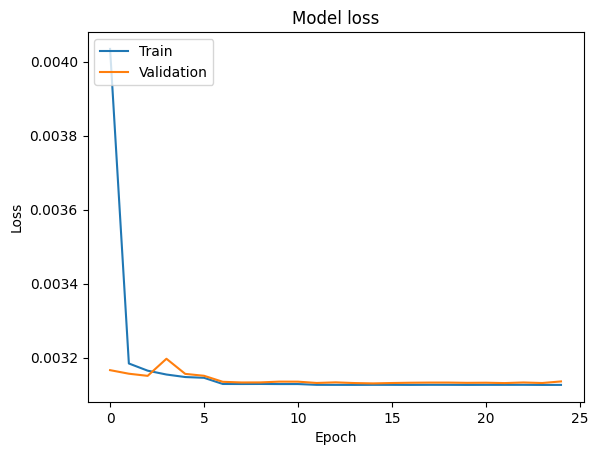

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()